In [219]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
from datetime import datetime
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, shapiro, kstest
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")



In [220]:
data = pd.read_csv("Files/data_final.csv", index_col = 0)

data.head()

,Attrition,Businesstravel,Dailyrate,Distancefromhome,Education,Educationfield,Employeenumber,Environmentsatisfaction,Gender,Hourlyrate,Jobinvolvement,Joblevel,Jobrole,Jobsatisfaction,Maritalstatus,Monthlyrate,Numcompaniesworked,Overtime,Percentsalaryhike,Performancerating,Relationshipsatisfaction,Stockoptionlevel,Totalworkingyears,Trainingtimeslastyear,Worklifebalance,Yearsatcompany,Yearsincurrentrole,Yearssincelastpromotion,Yearswithcurrmanager,Datebirth,Remotework,Employee_id
0,no,unknown,684.0,6,3,unknown,162,1,H,51.0,3,5,research director,3,unknown,6462,7,no,13,3,3,0,0,5,3,20,0,15,15,1972,unknown,162
1,no,unknown,699.0,1,4,life sciences,259,3,H,65.0,2,5,manager,3,unknown,5678,0,unknown,14,3,1,1,34,5,3,33,0,11,9,1971,yes,259
2,no,travel rarely,532.0,4,2,technical degree,319,3,H,58.0,3,5,manager,4,married,4933,1,no,11,3,4,0,22,3,0,22,0,11,15,1981,yes,319
3,no,travel rarely,359.0,2,4,medical,0,1,M,82.0,3,4,research director,3,married,26703,3,unknown,19,3,2,2,0,2,0,20,0,5,6,1976,no,3619
4,no,unknown,1319.0,3,3,technical degree,0,1,M,45.0,4,4,sales executive,1,divorced,7739,2,no,12,3,4,1,0,5,3,19,0,2,8,1977,no,8389


In [223]:
analisis =  data.loc[:, ["Datebirth", "Attrition", "Jobsatisfaction","Businesstravel","Distancefromhome","Environmentsatisfaction","Gender","Jobinvolvement","Jobrole","Monthlyrate","Overtime","Worklifebalance","Yearsatcompany",
"Remotework"]]

analisis

,Datebirth,Attrition,Jobsatisfaction,Businesstravel,Distancefromhome,Environmentsatisfaction,Gender,Jobinvolvement,Jobrole,Monthlyrate,Overtime,Worklifebalance,Yearsatcompany,Remotework
0,1972,no,3,unknown,6,1,H,3,research director,6462,no,3,20,unknown
1,1971,no,3,unknown,1,3,H,2,manager,5678,unknown,3,33,yes
2,1981,no,4,travel rarely,4,3,H,3,manager,4933,no,0,22,yes
3,1976,no,3,travel rarely,2,1,M,3,research director,26703,unknown,0,20,no
4,1977,no,1,unknown,3,1,M,4,sales executive,7739,no,3,19,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,1995,no,2,unknown,43,43,M,3,sales executive,3698,unknown,3,8,no
1602,1997,yes,3,unknown,5,3,M,2,research scientist,20898,unknown,3,8,yes
1603,1979,no,1,unknown,9,2,H,3,research scientist,7508,yes,3,8,no
1604,1982,yes,4,unknown,2,2,M,1,laboratory technician,17725,yes,2,7,unknown


In [225]:
analisis["Datebirth"] = pd.to_datetime(analisis["Datebirth"], format='%Y')

In [227]:
#calculamos edad

current_year = datetime.now().year

analisis["age"] = current_year - analisis["Datebirth"].dt.year

analisis = analisis.sort_values(by="age")

analisis

,Datebirth,Attrition,Jobsatisfaction,Businesstravel,Distancefromhome,Environmentsatisfaction,Gender,Jobinvolvement,Jobrole,Monthlyrate,Overtime,Worklifebalance,Yearsatcompany,Remotework,age
1352,2005-01-01,no,4,unknown,5,2,H,3,research scientist,13493,no,3,0,yes,19
1369,2005-01-01,yes,3,unknown,8,3,H,3,laboratory technician,13556,no,3,0,unknown,19
1391,2005-01-01,no,4,non-travel,1,4,M,3,laboratory technician,19305,unknown,4,0,no,19
1417,2005-01-01,yes,4,travel frequently,3,2,M,3,sales representative,18420,yes,4,0,yes,19
1277,2005-01-01,yes,3,unknown,3,3,H,3,laboratory technician,25233,no,3,0,yes,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1963-01-01,no,4,unknown,1,3,H,1,healthcare representative,20467,no,4,1,no,61
38,1963-01-01,no,1,travel frequently,28,3,M,2,sales executive,2845,no,4,18,yes,61
399,1963-01-01,no,4,unknown,29,29,H,4,sales executive,10893,unknown,3,11,yes,61
198,1963-01-01,no,1,unknown,7,1,M,3,manager,3854,no,1,29,yes,61


In [230]:
def clasificar_generacion(year):
    if year <= 1980:
        return "Generación X"
    else:
        return "Millennials"

# Aplicar la función a la columna "YearOfBirth" y crear una nueva columna llamada "Generacion"
analisis["breed"] = analisis["Datebirth"].dt.year.apply(clasificar_generacion)

In [231]:
def clasificar_satisfacion(nivel):
    if nivel >= 3:
        return "a"
    else:
        return "b"

# Aplicar la función a la columna "Jobsatisfaction" y crear una nueva columna llamada "Satisfaccion_clasificada"
analisis["class_job_sat"] = analisis["Jobsatisfaction"].apply(clasificar_satisfacion)

In [235]:
cols = ['date_birth', 'attrition', 'job_sat', 'bus_travel', 'dis_from_home', 'env_satisfaction', 'gender', 'job_inv', 'job_role', 'monthly_rate', 'over_time', 'work_life_balance', 'years_at_company', 'remote_work', 'age', 'breed', 'class_job_sat']

analisis.columns= cols

analisis.reset_index(drop= True, inplace= True)

analisis.head(3)


,date_birth,attrition,job_sat,bus_travel,dis_from_home,env_satisfaction,gender,job_inv,job_role,monthly_rate,over_time,work_life_balance,years_at_company,remote_work,age,breed,class_job_sat
0,2005-01-01,no,4,unknown,5,2,H,3,research scientist,13493,no,3,0,yes,19,Millennials,a
1,2005-01-01,yes,3,unknown,8,3,H,3,laboratory technician,13556,no,3,0,unknown,19,Millennials,a
2,2005-01-01,no,4,non-travel,1,4,M,3,laboratory technician,19305,unknown,4,0,no,19,Millennials,a


In [236]:
def to_lower_case(x):
    if isinstance(x, str):  
        return x.lower()
    else:
        return x 

In [237]:
analisis = analisis.applymap(to_lower_case)

- Generación X nacidos hasta 1980
- Generación millenials a partir 1981

- muy satisfechos (3,5) A
- poco satisfechos (1,2) B

In [239]:
analisis

,date_birth,attrition,job_sat,bus_travel,dis_from_home,env_satisfaction,gender,job_inv,job_role,monthly_rate,over_time,work_life_balance,years_at_company,remote_work,age,breed,class_job_sat
0,2005-01-01,no,4,unknown,5,2,H,3,research scientist,13493,no,3,0,yes,19,Millennials,a
1,2005-01-01,yes,3,unknown,8,3,H,3,laboratory technician,13556,no,3,0,unknown,19,Millennials,a
2,2005-01-01,no,4,non-travel,1,4,M,3,laboratory technician,19305,unknown,4,0,no,19,Millennials,a
3,2005-01-01,yes,4,travel frequently,3,2,M,3,sales representative,18420,yes,4,0,yes,19,Millennials,a
4,2005-01-01,yes,3,unknown,3,3,H,3,laboratory technician,25233,no,3,0,yes,19,Millennials,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,1963-01-01,no,4,unknown,1,3,H,1,healthcare representative,20467,no,4,1,no,61,Generación X,a
1582,1963-01-01,no,1,travel frequently,28,3,M,2,sales executive,2845,no,4,18,yes,61,Generación X,b
1583,1963-01-01,no,4,unknown,29,29,H,4,sales executive,10893,unknown,3,11,yes,61,Generación X,a
1584,1963-01-01,no,1,unknown,7,1,M,3,manager,3854,no,1,29,yes,61,Generación X,b


In [286]:
analisis_yes = analisis.loc[analisis["attrition"] == "yes"]

analisis_no = analisis.loc[analisis["attrition"] == "no"]

- "No" indica que el empleado no ha dejado la empresa (sin rotación)
- "Yes" indica que el empleado ha dejado la empresa (con rotación)

In [244]:
cross_tab = pd.crosstab(analisis["attrition"],analisis["breed"])

cross_tab

breed,Generación X,Millennials
attrition,,
no,362,967
yes,50,207


In [303]:
sns.set_style("darkgrid")


In [ ]:
 fontweight='bold')
axes[0].set_xlabel('Puesto de Trabajo', fontsize=12)

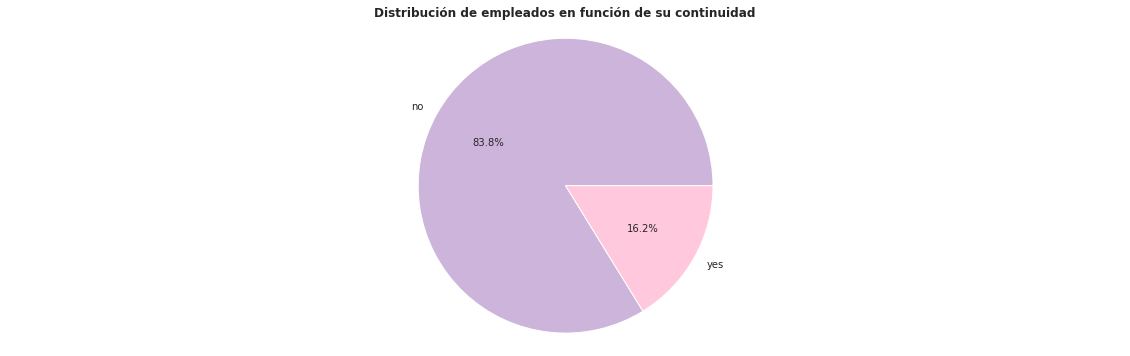

In [347]:

attrition_counts = analisis["attrition"].value_counts()

plt.figure(figsize=(20, 6))
plt.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', colors=["#cdb4db", "#ffc8dd"])
plt.axis('equal')
plt.title('Distribución de empleados en función de su continuidad', fontweight='bold');


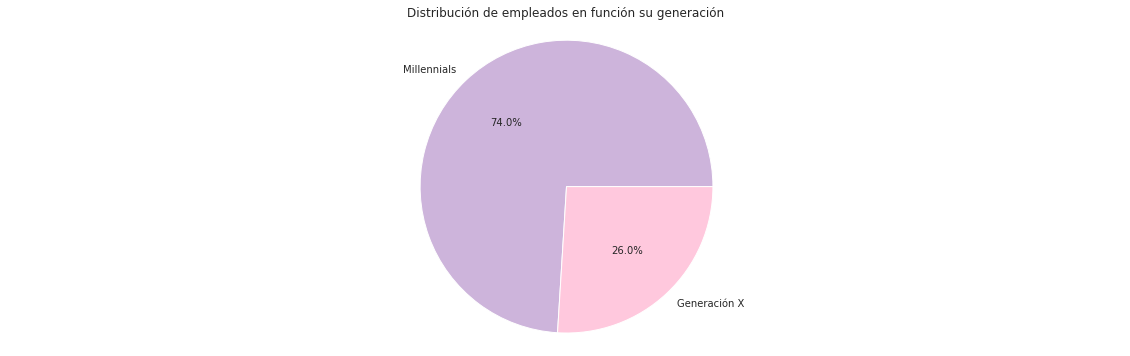

In [304]:
breed_counts = analisis["breed"].value_counts()

plt.figure(figsize=(20, 6))
plt.pie(breed_counts.values, labels=breed_counts.index, autopct='%1.1f%%', colors=["#cdb4db", "#ffc8dd"])
plt.axis('equal')
plt.title('Distribución de empleados en función su generación');


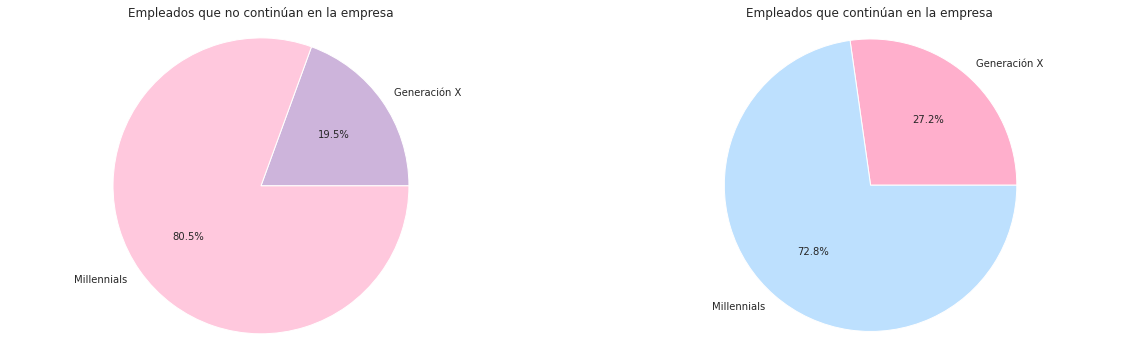

In [296]:
# Subgráfico 1: Empleados que no continúan en la empresa
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subgráfico
breed_att_yes = analisis_yes.groupby(["breed"]).size()
plt.pie(breed_att_yes.values, labels=breed_att_yes.index, autopct='%1.1f%%', colors=["#cdb4db", "#ffc8dd"])
plt.axis('equal')
plt.title('Empleados que no continúan en la empresa')

# Subgráfico 2: Empleados que continúan en la empresa
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subgráfico
breed_att_no = analisis_no.groupby(["breed"]).size()
plt.pie(breed_att_no.values, labels=breed_att_no.index, autopct='%1.1f%%', colors=["#ffafcc", "#bde0fe"])
plt.axis('equal')
plt.title('Empleados que continúan en la empresa');

- **Interpretación**

    En el gráfico observamos que la plantilla de empleados de ABC está compuesta principalmente por millenials. También observamos que del 16.2% de empleados que no continuan su distribución por generación es similar a la distrución por generación de los que sí continuan.


In [254]:

cross_tab2 = pd.crosstab([analisis[analisis["attrition"] == "yes"]["breed"], 
                          analisis[analisis["attrition"] == "yes"]["class_job_sat"]],
                         columns="count").reset_index()

cross_tab2

col_0,breed,class_job_sat,count
0,Generación X,a,29
1,Generación X,b,21
2,Millennials,a,105
3,Millennials,b,102


In [256]:
cross_tab3 = pd.crosstab([analisis[analisis["attrition"] == "no"]["breed"], 
                          analisis[analisis["attrition"] == "no"]["class_job_sat"]],
                         columns="count").reset_index()

cross_tab3

col_0,breed,class_job_sat,count
0,Generación X,a,226
1,Generación X,b,136
2,Millennials,a,613
3,Millennials,b,354


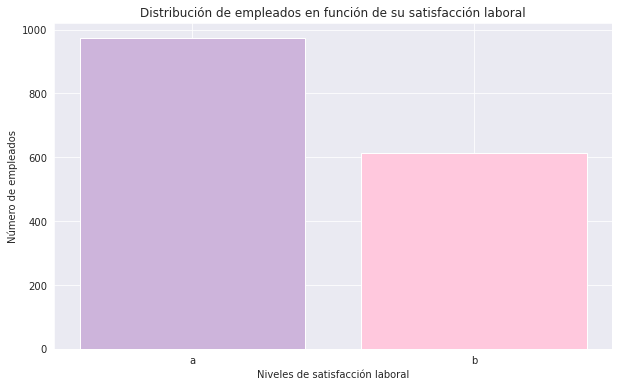

In [311]:
satisfaccion_counts = analisis["class_job_sat"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(satisfaccion_counts.index, satisfaccion_counts.values, color=["#cdb4db", "#ffc8dd"])
plt.xlabel('Niveles de satisfacción laboral')
plt.ylabel('Número de empleados')
plt.title('Distribución de empleados en función de su satisfacción laboral');

Text(0, 0.5, 'Número de empleados')

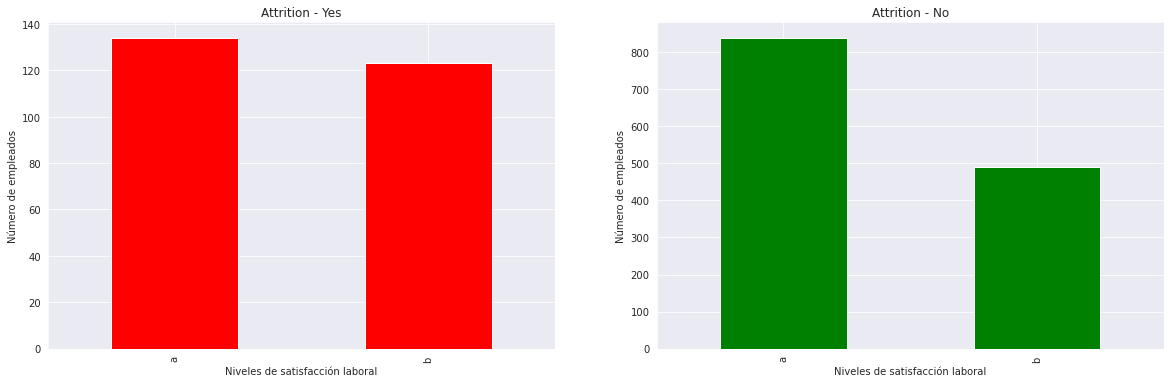

In [314]:
satisfaccion_attrition_counts = analisis.groupby(['class_job_sat', 'attrition']).size().unstack()

# Crear los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Gráfico para 'Yes'
satisfaccion_attrition_counts['yes'].plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Attrition - Yes')
axes[0].set_xlabel('Niveles de satisfacción laboral')
axes[0].set_ylabel('Número de empleados')

# Gráfico para 'No'
satisfaccion_attrition_counts['no'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Attrition - No')
axes[1].set_xlabel('Niveles de satisfacción laboral')
axes[1].set_ylabel('Número de empleados')

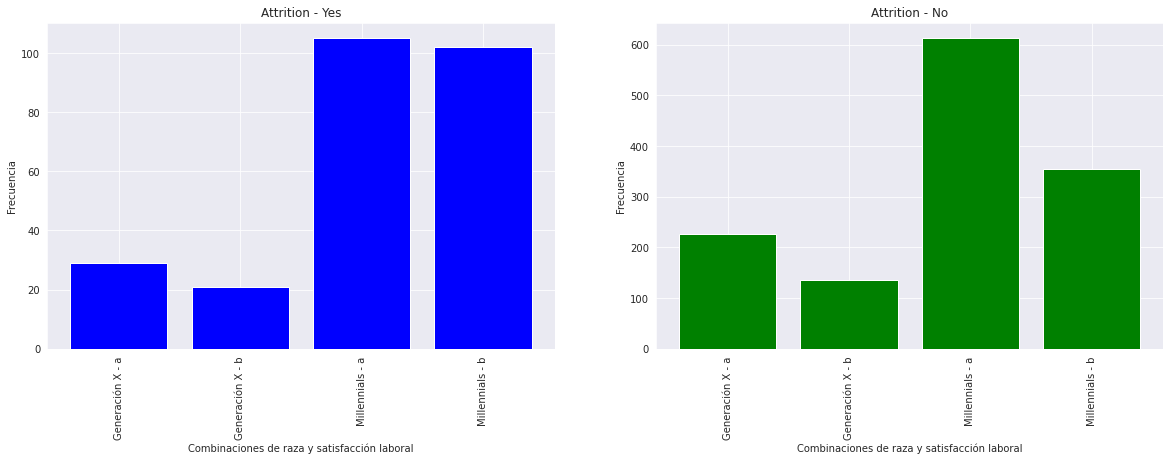

In [310]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Gráfico para "attrition" == "yes"
axes[0].bar(range(len(cross_tab2)), cross_tab2["count"], color='blue')
axes[0].set_title('Attrition - Yes')
axes[0].set_xlabel('Combinaciones de raza y satisfacción laboral')
axes[0].set_ylabel('Frecuencia')
axes[0].set_xticks(range(len(cross_tab2)))
axes[0].set_xticklabels([f'{breed} - {class_job_sat}' for breed, class_job_sat in zip(cross_tab2["breed"], cross_tab2["class_job_sat"])], rotation=90)

# Gráfico para "attrition" == "no"
axes[1].bar(range(len(cross_tab3)), cross_tab3["count"], color='green')
axes[1].set_title('Attrition - No')
axes[1].set_xlabel('Combinaciones de raza y satisfacción laboral')
axes[1].set_ylabel('Frecuencia')
axes[1].set_xticks(range(len(cross_tab3)))
axes[1].set_xticklabels([f'{breed} - {class_job_sat}' for breed, class_job_sat in zip(cross_tab3["breed"], cross_tab3["class_job_sat"])], rotation=90);


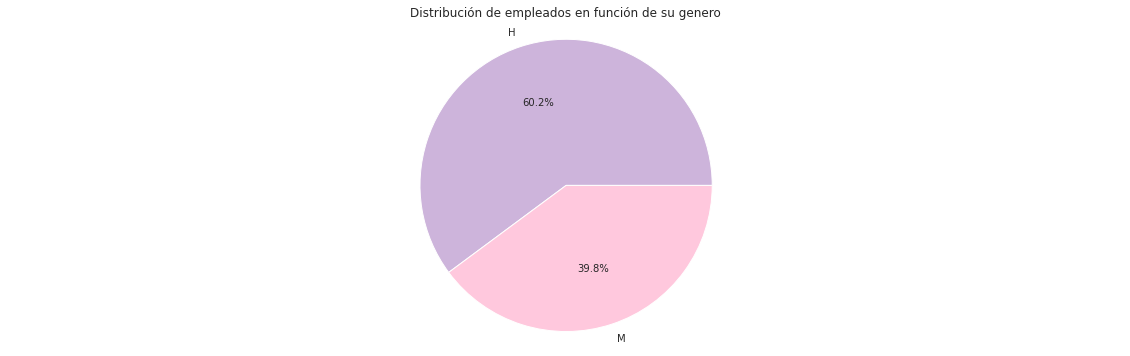

In [323]:
gender_counts = analisis["gender"].value_counts()

plt.figure(figsize=(20, 6))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=["#cdb4db", "#ffc8dd"])
plt.axis('equal')
plt.title('Distribución de empleados en función de su genero');


In [317]:
cross_tab4 = pd.crosstab(analisis["attrition"],analisis["gender"])

cross_tab4

gender,H,M
attrition,,
no,793,536
yes,161,96


Text(0, 0.5, 'Número de empleados')

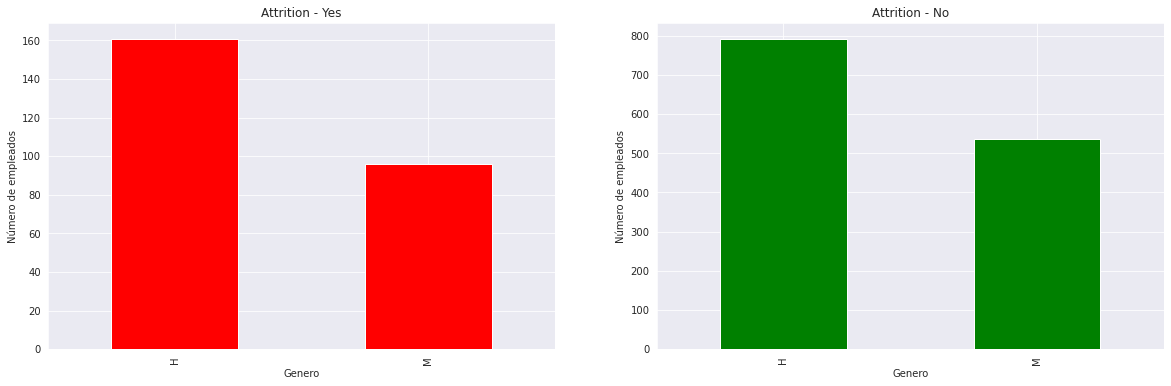

In [326]:
gender_attrition_counts = analisis.groupby(['gender', 'attrition']).size().unstack()

# Crear los subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Gráfico para 'Yes'
gender_attrition_counts['yes'].plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title('Attrition - Yes')
axes[0].set_xlabel('Genero')
axes[0].set_ylabel('Número de empleados')

# Gráfico para 'No'
gender_attrition_counts['no'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Attrition - No')
axes[1].set_xlabel('Genero')
axes[1].set_ylabel('Número de empleados')

In [320]:
cross_tab5 = pd.crosstab([analisis[analisis["attrition"] == "yes"]["gender"], 
                          analisis[analisis["attrition"] == "yes"]["class_job_sat"]],
                         columns="count").reset_index()

cross_tab5

col_0,gender,class_job_sat,count
0,H,a,88
1,H,b,73
2,M,a,46
3,M,b,50


In [321]:
cross_tab6 = pd.crosstab([analisis[analisis["attrition"] == "no"]["gender"], 
                          analisis[analisis["attrition"] == "no"]["class_job_sat"]],
                         columns="count").reset_index()

cross_tab6

col_0,gender,class_job_sat,count
0,H,a,510
1,H,b,283
2,M,a,329
3,M,b,207


In [330]:
analisis.columns

Index(['date_birth', 'attrition', 'job_sat', 'bus_travel', 'dis_from_home',
       'env_satisfaction', 'gender', 'job_inv', 'job_role', 'monthly_rate',
       'over_time', 'work_life_balance', 'years_at_company', 'remote_work',
       'age', 'breed', 'class_job_sat'],
      dtype='object')

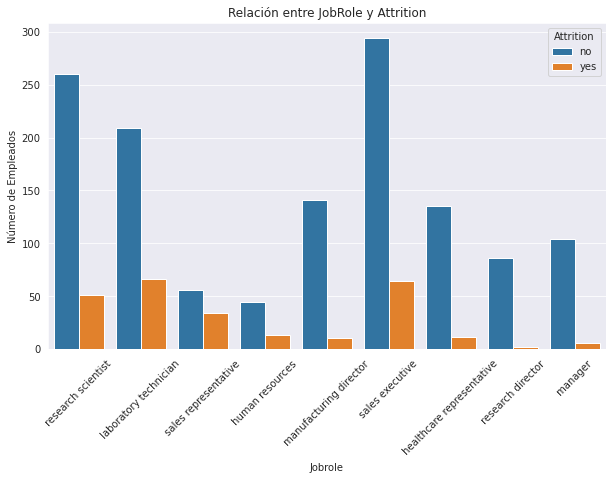

In [333]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='job_role', hue='attrition', data=analisis)
plt.title('Relación entre JobRole y Attrition')
plt.xlabel('Jobrole')
plt.ylabel('Número de Empleados')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.show()

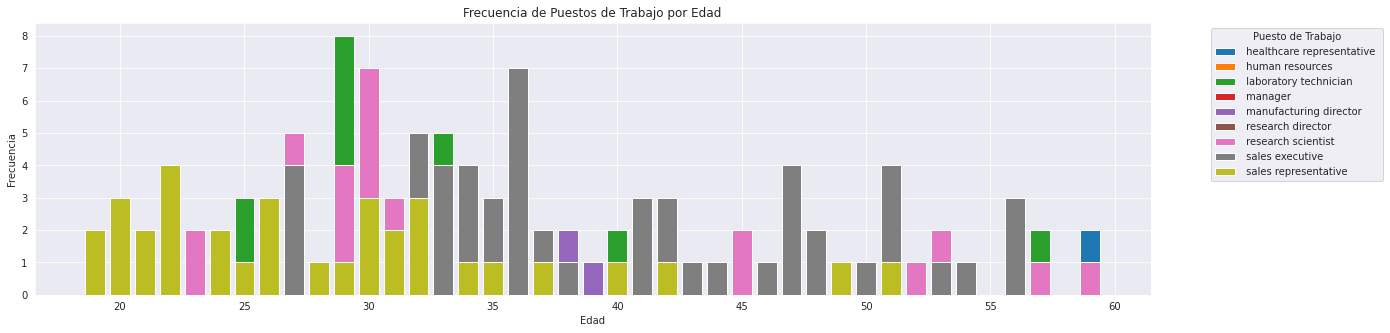

In [334]:
edad_puesto = continuos.groupby(['edad', 'puesto']).size().unstack(fill_value=0)

# Crear el gráfico de barras
plt.figure(figsize=(20, 5))

# Iterar sobre las columnas del DataFrame para agregar barras para cada puesto de trabajo
for puesto in edad_puesto.columns:
    plt.bar(edad_puesto.index, edad_puesto[puesto], label=puesto)

# Personalizar el gráfico
plt.title('Frecuencia de Puestos de Trabajo por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Puesto de Trabajo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True);

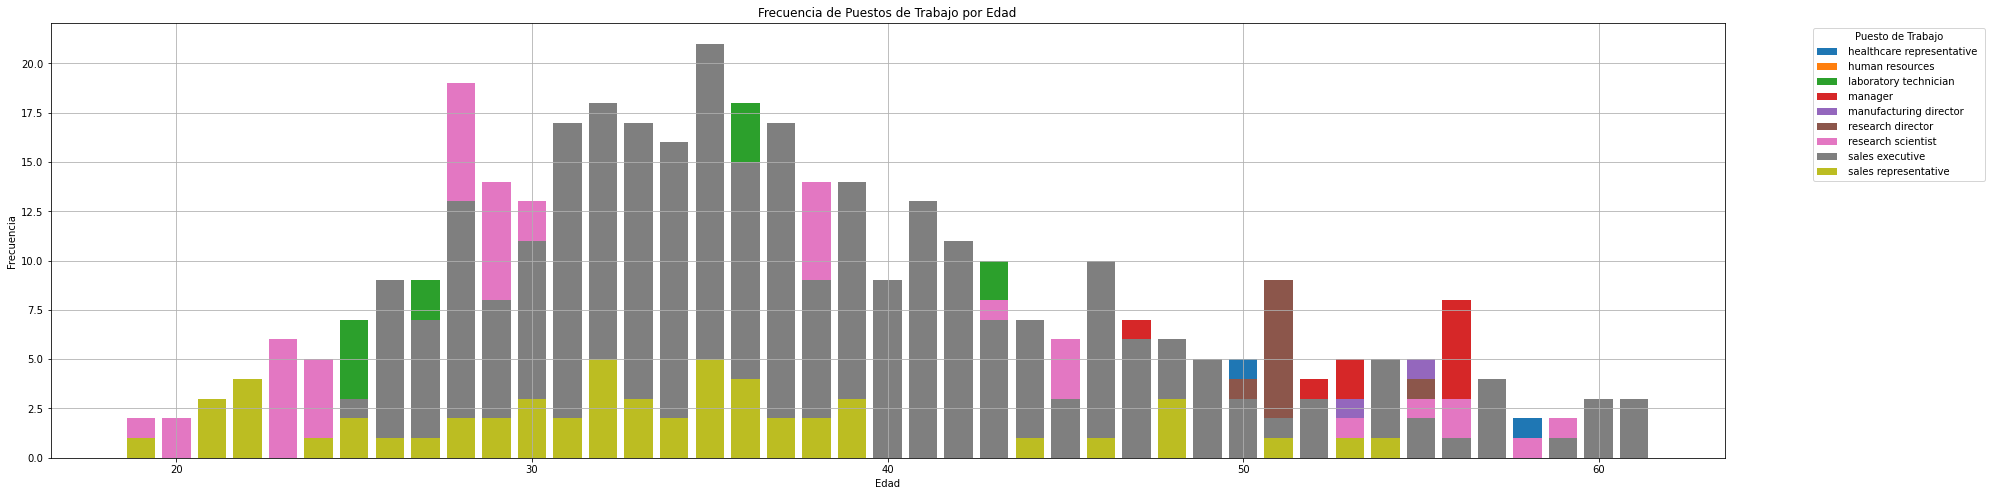

In [132]:
edad_puesto_non_continuos = no_continuos.groupby(['edad', 'puesto']).size().unstack(fill_value=0)

# Crear el gráfico de barras
plt.figure(figsize=(30, 8))

# Iterar sobre las columnas del DataFrame para agregar barras para cada puesto de trabajo
for puesto in edad_puesto_non_continuos.columns:
    plt.bar(edad_puesto_non_continuos.index, edad_puesto_non_continuos[puesto], label=puesto)

# Personalizar el gráfico
plt.title('Frecuencia de Puestos de Trabajo por Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.legend(title='Puesto de Trabajo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True);

In [191]:
continuos

,anyo,continuidad,sat_laboral,viajes,distancia,sat_entorno,genero,implicacion,puesto,salario_mensual,horas_extra,balance_vida,anyos_companyia,tele_trabajo,edad,generacion
1,2005-01-01,yes,3,unknown,8,3,h,3,laboratory technician,13556,no,3,0,unknown,19,millennials
3,2005-01-01,yes,4,travel frequently,3,2,m,3,sales representative,18420,yes,4,0,yes,19,millennials
4,2005-01-01,yes,3,unknown,3,3,h,3,laboratory technician,25233,no,3,0,yes,19,millennials
6,2005-01-01,yes,2,travel frequently,5,2,h,3,sales representative,8059,yes,3,0,no,19,millennials
9,2004-01-01,yes,1,travel frequently,1,3,m,1,sales representative,20989,no,0,0,unknown,20,millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1965-01-01,yes,4,travel rarely,23,4,m,3,healthcare representative,3465,unknown,2,40,unknown,59,generación x
1567,1965-01-01,yes,1,unknown,14,14,m,2,manufacturing director,12023,unknown,2,10,yes,59,generación x
1568,1965-01-01,yes,4,travel frequently,2,4,h,2,laboratory technician,13384,unknown,2,1,yes,59,generación x
1569,1965-01-01,yes,3,travel rarely,2,4,h,3,research scientist,26227,no,3,1,no,59,generación x


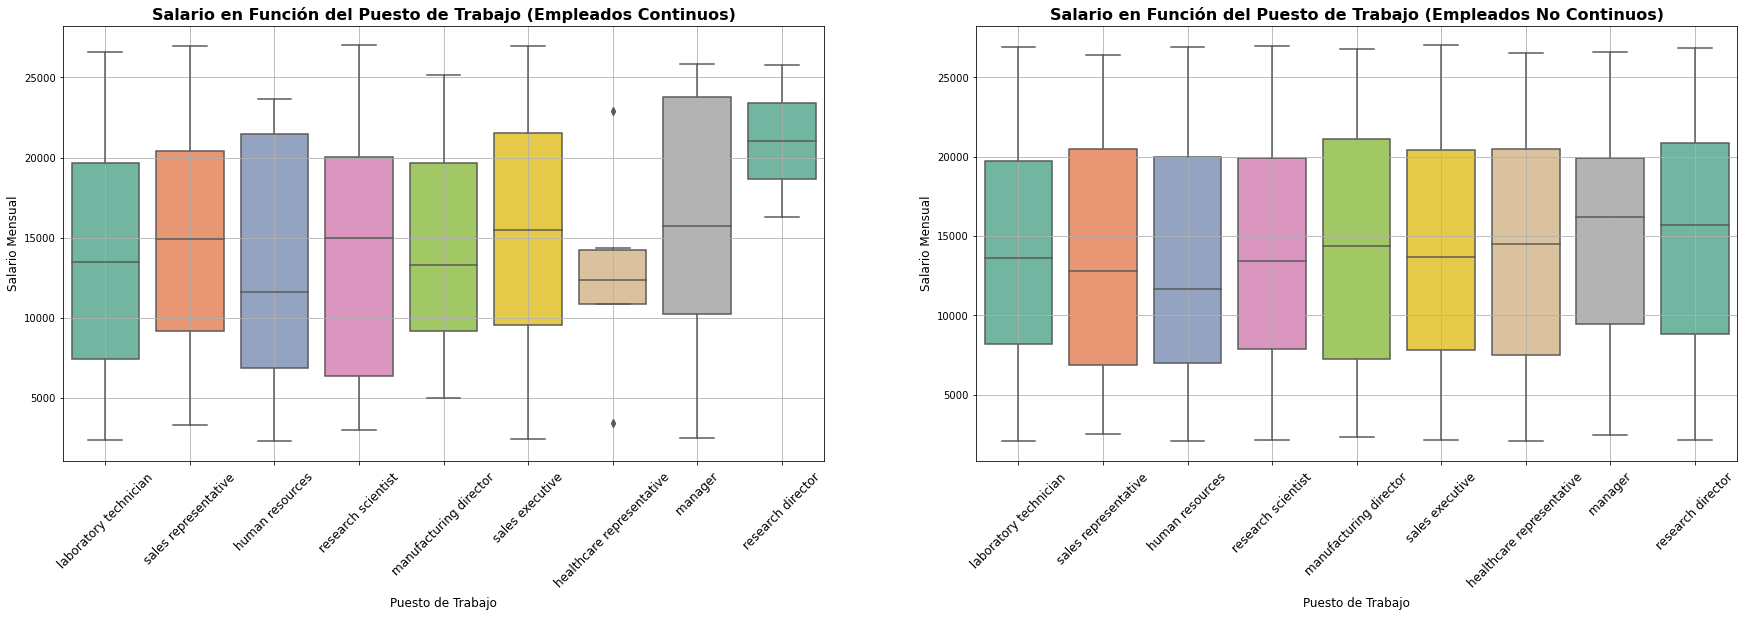

In [205]:
# Definir el orden de las categorías y la paleta de colores
order = continuos['puesto'].unique()  # Obtener el orden de las categorías desde los datos
palette = sns.color_palette("Set2", n_colors=len(order))  # Definir una paleta de colores basada en el número de categorías

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8))

# Boxplot para empleados continuos
sns.boxplot(data=continuos, x='puesto', y='salario_mensual', order=order, palette=palette, ax=axes[0])
axes[0].set_title('Salario en Función del Puesto de Trabajo (Empleados Continuos)', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Puesto de Trabajo', fontsize=12)
axes[0].set_ylabel('Salario Mensual', fontsize=12)
axes[0].tick_params(axis='x', labelsize=12,rotation=45)
axes[0].grid(True)

# Boxplot para empleados no continuos
sns.boxplot(data=no_continuos, x='puesto', y='salario_mensual', order=order, palette=palette, ax=axes[1])
axes[1].set_title('Salario en Función del Puesto de Trabajo (Empleados No Continuos)', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Puesto de Trabajo', fontsize=12)
axes[1].set_ylabel('Salario Mensual', fontsize=12)
axes[1].tick_params(axis='x', labelsize=12,rotation=45)
axes[1].grid(True)

In [337]:
analisis.head(5)

,date_birth,attrition,job_sat,bus_travel,dis_from_home,env_satisfaction,gender,job_inv,job_role,monthly_rate,over_time,work_life_balance,years_at_company,remote_work,age,breed,class_job_sat
0,2005-01-01,no,4,unknown,5,2,H,3,research scientist,13493,no,3,0,yes,19,Millennials,a
1,2005-01-01,yes,3,unknown,8,3,H,3,laboratory technician,13556,no,3,0,unknown,19,Millennials,a
2,2005-01-01,no,4,non-travel,1,4,M,3,laboratory technician,19305,unknown,4,0,no,19,Millennials,a
3,2005-01-01,yes,4,travel frequently,3,2,M,3,sales representative,18420,yes,4,0,yes,19,Millennials,a
4,2005-01-01,yes,3,unknown,3,3,H,3,laboratory technician,25233,no,3,0,yes,19,Millennials,a


In [338]:
analisis["over_time"].value_counts()

no         667
unknown    665
yes        254
Name: over_time, dtype: int64

In [342]:
data_horas_extra = analisis.loc[analisis['bus_travel'] != "unknown", :]

data_viajes = analisis.loc[analisis['over_time'] != "unknown", :]

ValueError: min() arg is an empty sequence

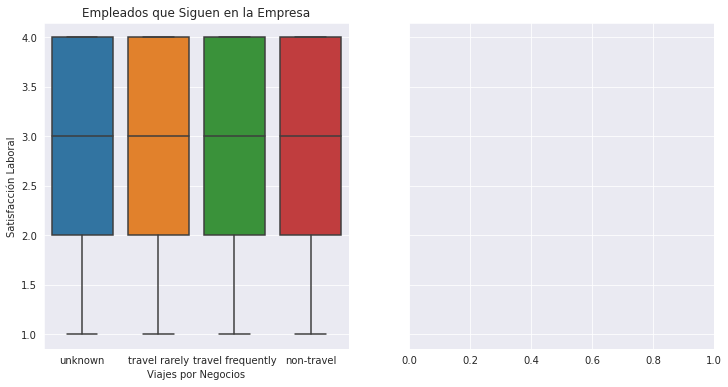

In [344]:

# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), sharey=True)

# Boxplot de satisfacción laboral para empleados que siguen en la empresa
sns.boxplot(data=data_viajes[data_viajes["attrition"] == "no"], x='bus_travel', y='job_sat', ax=axes[0])
axes[0].set_title('Empleados que Siguen en la Empresa')
axes[0].set_xlabel('Viajes por Negocios')
axes[0].set_ylabel('Satisfacción Laboral')

# Boxplot de satisfacción laboral para empleados que no siguen en la empresa
sns.boxplot(data=data_viajes[data_viajes["attrition"] == "si"],x='bus_travel', y='job_sat', ax=axes[1])
axes[1].set_title('Empleados que No Siguen en la Empresa')
axes[1].set_xlabel('Viajes por Negocios')
axes[1].set_ylabel('Satisfacción Laboral')

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

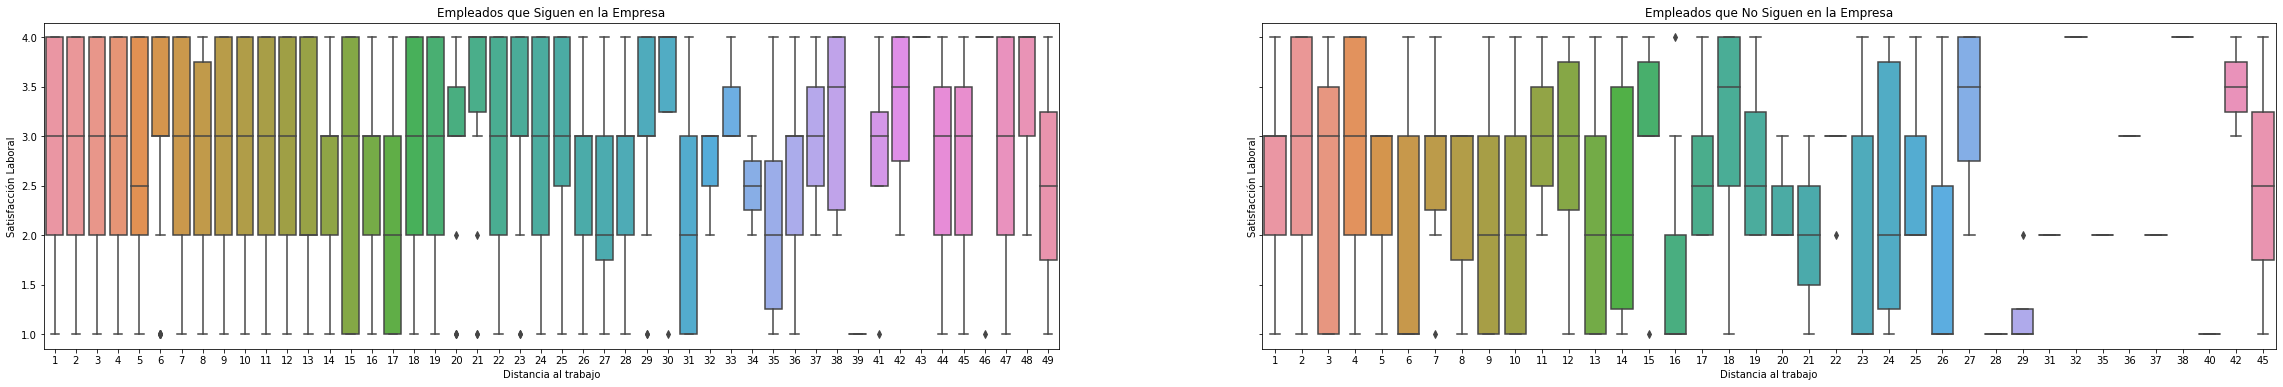

In [157]:

# Crear subgráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 6), sharey=True)

# Boxplot de satisfacción laboral para empleados que siguen en la empresa
sns.boxplot(data=no_continuos, x='ditancia', y='sat_laboral', ax=axes[0])
axes[0].set_title('Empleados que Siguen en la Empresa')
axes[0].set_xlabel('Distancia al trabajo')
axes[0].set_ylabel('Satisfacción Laboral')

# Boxplot de satisfacción laboral para empleados que no siguen en la empresa
sns.boxplot(data=continuos,x='ditancia', y='sat_laboral', ax=axes[1])
axes[1].set_title('Empleados que No Siguen en la Empresa')
axes[1].set_xlabel('Distancia al trabajo')
axes[1].set_ylabel('Satisfacción Laboral');

In [164]:
continuos["balance_vida"].unique()

array([3., 4., 2., 1.])

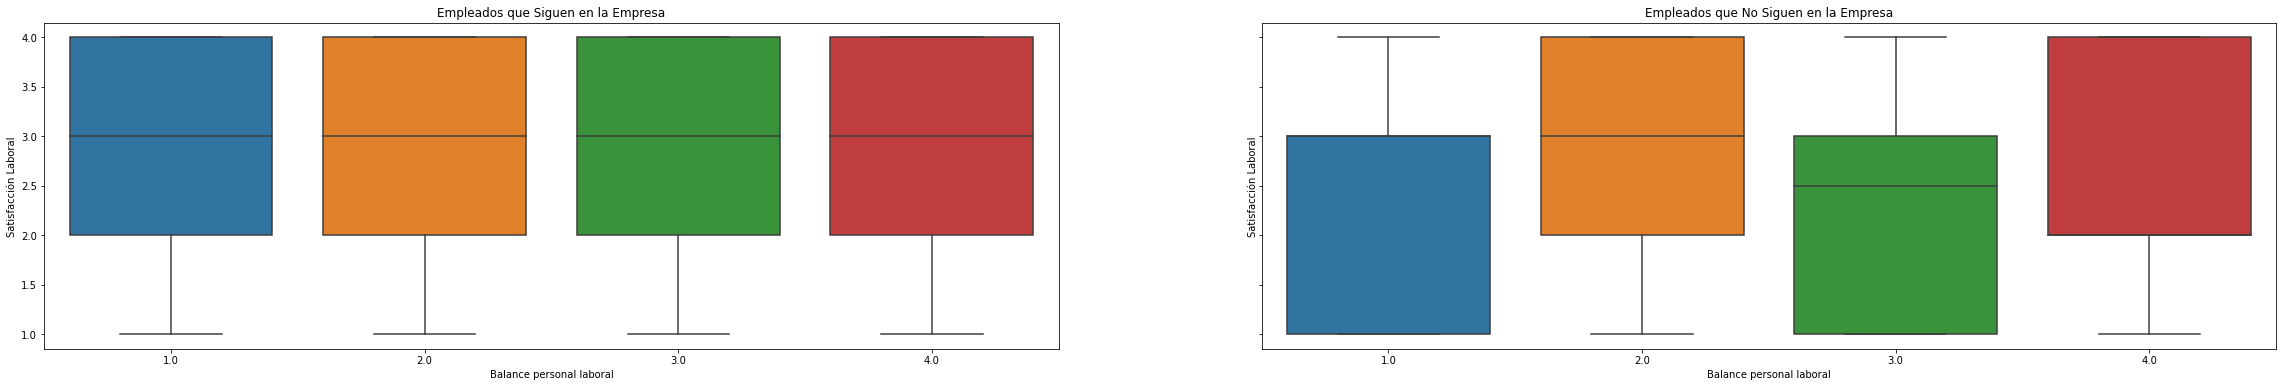

In [163]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 6), sharey=True)

# Boxplot de satisfacción laboral para empleados que siguen en la empresa
sns.boxplot(data=no_continuos, x='balance_vida', y='sat_laboral', ax=axes[0])
axes[0].set_title('Empleados que Siguen en la Empresa')
axes[0].set_xlabel('Balance personal laboral')
axes[0].set_ylabel('Satisfacción Laboral')

# Boxplot de satisfacción laboral para empleados que no siguen en la empresa
sns.boxplot(data=continuos,x='balance_vida', y='sat_laboral', ax=axes[1])
axes[1].set_title('Empleados que No Siguen en la Empresa')
axes[1].set_xlabel('Balance personal laboral')
axes[1].set_ylabel('Satisfacción Laboral');